# Aprendizado de Máquina - TP1
# Classificação de Exoplanetas

O trabalho tem como objetivo a prática de conceitos aprendidos na disciplina, adquirindo experiência no uso de métodos de classificação, na avaliação de modelos, e na interpretação e apresentação de resultados de experimentos. Para isso, utilizaremos e compararemos diferentes métodos para solucionar um problema de classificação binária.  

O problema abordado é o da classificação de exoplanetas identificados pela sonda espacial *Kepler* entre **confirmados** e **falsos positivos**. Os possíveis exoplanetas são chamados **Kepler Object of Interest (KOI)**, e cada observação do conjunto de dados corresponde a um KOI e suas características estimadas.

Serão explorados os seguintes métodos de classificação:
- [x] **Naive Bayes**
    - [x] Apenas um experimento, para servir de baseline.
- [x] **Decision Tree**
    - [x] Variação de altura máxima da árvore, incluindo ilimitada
    - [x] Visualização gráfica dos resultados
- [x] **SVM**
    - [x] Avaliação dos Kernels
        - [x] Linear
        - [x] Sigmoid
        - [x] Polinomial
        - [x] RBF
- [x] **k-NN**
    - [x] Variação do número de vizinhos *k*
    - [x] Visualização gráfica dos resultados
- [x] **Random Forest**
    - [x] Variação do número de árvores
    - [x] Visualização gráfica dos resultados
- [x] **Gradient Tree Boosting**
    - [x] Variação do número de iterações
    - [x] Visualização gráfica dos resultados

Os métodos estão disponíveis no módulo `scikit-learn`. Iremos utilizar também os módulos `numpy`, `matplotlib.pyplot` e `pandas` para operações matemáticas, geração de gráficos, e manipulação do conjunto de dados, respectivamente.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Verificação e Tratamento de Dados

In [9]:
koi = pd.read_csv("koi_data.csv")
koi = koi.set_index("kepoi_name")
koi.isnull().sum()

koi_disposition     0
koi_period          0
koi_impact          0
koi_duration        0
koi_depth           0
koi_ror             0
koi_srho            0
koi_prad            0
koi_sma             0
koi_incl            0
koi_teq             0
koi_insol           0
koi_dor             0
koi_max_sngle_ev    0
koi_max_mult_ev     0
koi_model_snr       0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_smass           0
koi_kepmag          0
koi_gmag            0
koi_rmag            0
koi_imag            0
koi_zmag            0
koi_jmag            0
koi_hmag            0
koi_kmag            0
koi_fwm_stat_sig    0
koi_fwm_sra         0
koi_fwm_sdec        0
koi_fwm_srao        0
koi_fwm_sdeco       0
koi_fwm_prao        0
koi_fwm_pdeco       0
koi_dicco_mra       0
koi_dicco_mdec      0
koi_dicco_msky      0
koi_dikco_mra       0
koi_dikco_mdec      0
koi_dikco_msky      0
dtype: int64

Não há dados faltantes no conjunto de dados.

In [10]:
target = koi["koi_disposition"] # Classificação de interesse
koi = koi.drop("koi_disposition", axis=1) # Essa separação facilita o uso dos métodos em sklearn
target = target.replace({"CONFIRMED": 1, "FALSE POSITIVE": 0}) # Essa transformação facilita o uso do módulo sklearn.metrics
target.index = koi.index
target.describe()

count    5202.000000
mean        0.404460
std         0.490834
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: koi_disposition, dtype: float64

Temos duas classes de interesse, e pela proporção observada de falsos positivos (3098/5202), não há sub-representação relevante.

In [11]:
koi.describe()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,...,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000
mean,37.032237,0.717106,5.607025,21340.318993,0.235205,3.415370,112.230798,0.158146,81.181413,1143.721069,...,-0.355681,-0.805629,-0.000263,0.000439,-0.049743,-0.087413,1.930251,-0.038402,-0.098738,1.920226
std,88.417985,2.628207,6.962634,66989.808550,2.586213,25.131368,3699.799318,0.241792,16.308839,775.788868,...,10.978677,14.741473,0.065707,0.077519,2.465670,2.746534,3.147553,2.465094,2.734732,3.142764
min,0.306940,0.000000,0.104600,0.800000,0.001290,0.000040,0.080000,0.007200,2.290000,92.000000,...,-275.600000,-397.620000,-4.000000,-0.800000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000
25%,2.213962,0.226000,2.500250,176.800000,0.013058,0.176092,1.460000,0.033000,81.930000,615.250000,...,-0.500000,-0.570000,-0.000240,-0.000240,-0.270000,-0.291500,0.128250,-0.265250,-0.320000,0.180000
50%,7.386755,0.610000,3.805500,495.950000,0.024185,0.748045,2.600000,0.073650,87.890000,948.000000,...,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.460000,-0.007000,-0.018000,0.453000
75%,23.448117,0.923750,6.000750,2120.525000,0.171260,2.267063,21.645000,0.158200,89.520000,1482.000000,...,0.500000,0.450000,0.000260,0.000280,0.230000,0.230000,2.570000,0.226250,0.250000,2.420000
max,1071.232620,100.806000,138.540000,864260.000000,99.870650,918.752390,200346.000000,2.034500,90.000000,9791.000000,...,97.780000,98.780000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,31.200000,89.600000


**Temos muita variação entre as grandezas dos atributos.** (e.g: `koi_depth` e `koi_fwm_pdeco`)  
**Deve ser interessante normalizar os dados para melhor funcionamento de alguns modelos.**

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
koi_minmax = min_max_scaler.fit_transform(koi.values)
koi_minmax = pd.DataFrame(koi_minmax,columns=koi.columns, index=koi.index)
koi_minmax.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,
K00752.01,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
K00752.02,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
K00754.01,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
K00755.01,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
K00114.01,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866


# Validação Cruzada K-Fold

Para evitar [*overfitting*](https://en.wikipedia.org/wiki/Overfitting) em um classificador, dividimos o conjunto de dados em subconjuntos de **treino** e **teste** (também chamado de _validação_, evitei este termo para não confundir com _training/test/validation sets_). Essa técnica é chamada de **validação cruzada**.
- **Treino**: dados usados para definir os parâmetros do modelo classificador.
- **Teste**: dados usados para avaliar a generalização do classificador, isto é, sua performance para dados desconhecidos.

Existem diversas estratégias de validação cruzada. Neste trabalho usaremos a validação **k-fold**, a fim de estimar a qualidade de um modelo com boa confiabilidade. Ela se dá pelos seguintes passos:
- O conjunto de dados é dividido em $k$ partes de tamanhos iguais;
- O modelo é treinado $k$ vezes, em cada uma delas usando um dos subconjuntos como conjunto de teste e a união dos *k-1* subconjuntos restantes como conjunto de treinamento;
    - Para cada iteração, o modelo é avaliado.
- Por fim, a qualidade do modelo para a tarefa é sumarizada a partir dos resultados obtidos.

Utilizaremos a implementação da classe `sklearn.model_selection.KFold`.

In [13]:
from sklearn.model_selection import KFold
kfold = KFold(5, shuffle=True) # 5 e 10 são valores comumente escolhidos para k

# Avaliação dos experimentos

Cada experimento realizado será avaliado pelas seguintes métricas:
- Acurácia
- Revocação
- Precisão 
- Área abaixo da curva ROC (ROC AUC)

Para melhor organizar e facilitar o acesso os resultados, estes serão guardados em um `DataFrame`.

In [14]:
results = pd.DataFrame(np.zeros(shape=(12,4)),columns=['Acurácia', 'Precisão', 'Revocação', 'ROC AUC'])
indexes = [['Naive Bayes', 'Decision Tree', 'SVM', 'k-NN', 'Random Forest', 'Gradient Tree Boosting'], ['Média', 'Desvio Padrão']]
results.index = pd.MultiIndex.from_product(indexes, names=['Método', 'Medida'])

Uma função para obter e empacotar essas métricas será bastante útil. Faremos uso do módulo `sklearn.metrics`:

In [15]:
from sklearn import metrics

def evaluate_prediction(y, y_pred):
    return [
        metrics.accuracy_score(y, y_pred),
        metrics.precision_score(y, y_pred),
        metrics.recall_score(y, y_pred),
        metrics.roc_auc_score(y, y_pred)
    ]

---

# Naive Bayes 

O Naive Bayes é um método que parte da suposição de que os atributos ($X$) das observações são condicionalmente independentes entre si, dado o valor da classe de interesse ($y$, ou `target`). Partindo dessa hipótese, a probabilidade de ocorrência de cada possível valor de `y` para uma observação do nosso conjunto de dados é facilmente calculado usando o teorema de Bayes.  

A classificação de uma observação é então dada por:
$$\begin{align}\begin{aligned}\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

Para o cálculo de $P(x_i \mid y)$, assumiremos que as distribuições de probabilidade das _features_ seguem uma normal. Por ser uma distribuição frequentemente observada, parece uma suposição razoável. O objeto `GaussianNB` realiza a parametrização do Naive Bayes dessa forma. 

Faremos apenas um experimento, que servirá como uma primeira tentativa de solução do problema, e base de comparação para os outros métodos.

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_results = []
for train, test in kfold.split(koi, target):
    y_pred = gnb.fit(koi.iloc[train], target[train]).predict(koi.iloc[test])
    gnb_results.append(evaluate_prediction(target[test], y_pred))
gnb_results = np.array(gnb_results)
results.loc["Naive Bayes"] =  [gnb_results.mean(axis=0), gnb_results.std(axis=0)]
results.loc["Naive Bayes"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.798734,0.674083,0.974292,0.826831
Desvio Padrão,0.017344,0.021084,0.002225,0.014809


Embora o valor de revocação seja alto, a precisão do modelo é péssima; isto é, a classificação está muito branda, e o modelo acerta muito na classe de interesse, enquanto também produz muitos falsos positivos.  

O cálculo de $P(y \mid X)$ está favorecendo $P(y = 1 \mid X)$ mais frequentemente do que deveria. Pode ser que classe a classe de exoplanetas $y = 0$ tenha _outliers_ para algumas features, enviesando as médias $\mu_0$ e consequentemente fazendo com que $\prod_{i=1}^{n} P(x_i \mid y = 1)$ seja mais frequentemente maior que $\prod_{i=1}^{n} P(x_i \mid y = 0)$, por se tratarem de distribuições gaussianas.

Além disso, a suposição ingênua de que os atributos de um KOI são condicionalmente independentes não é condizente com o problema real. Por exemplo, as dimensões de um corpo espacial têm influência sobre o seu trajeto no espaço.

---

# Decision Tree

Árvores de decisão podem ser usadas tanto para classificação (o problema em questão) quanto para regressão. A ideia é prever a classe de um elemento por meio do reconhecimento de regras simples de decisão, deduzidas pelos dados de treino. Em outras palavras, o algoritmo classifica o elemento de entrada a partir de "perguntas" sobre seus atributos, as quais o classificam a partir da classe de observações do conjunto de treino que deram as mesmas respostas. 

Esse fluxo é representado por uma árvore binária, em que cada nó tem um conjunto de indivíduos e uma proposição lógica (a "pergunta"), cujo valor é usado para obter dois subconjuntos, os quais serão atribuídos aos nós filhos. Estes, de mesma forma, terão seus dados divididos por outra proposição, e assim por diante, até que subconjuntos puros sejam obtidos, ou a profundidade máxima da árvore seja atingida. 

Uma entrada é classificada de acordo com o nó-folha ao qual suas respostas às perguntas da árvore a direcionarem. Se o nó-folha não for associado a um subconjunto homogêneo, a classe associada será a de maior frequência.

Vamos realizar experimentos variando a altura máxima permitida da árvore, a fim de analisar o impacto desse hiperparâmetro. O módulo `sklearn.tree` contém a implementação de uma árvore de decisão classificadora (`DecisionTreeClassifier`).

O algoritmo será executado escolhendo as proposições que melhor dividem o conjunto de dados de um nó, usando a medida de impureza de Gini. Cada divisão será feita escolhendo a proposição que minimiza essa medida nas suas divisões, de forma gulosa. Também é possível selecionar proposições de forma estocástica, a fim de evitar _overfitting_ do modelo.

Para começar, vamos experimentar usar uma árvore de tamanho máximo ilimitado. Isto é, a árvore cresce em profundidade o quanto for necessário para que os nós-folha tenham conjuntos puros. A árvore resultante terá acurácia perfeita para os dados de treino, mas deve sofrer de _overfitting_; por ser demasiadamente complexa para classificar o conjunto de treinamento perfeitamente, provavelmente não é um modelo muito generalizável. 

### Árvore de decisão com profundidade máxima ilimitada

In [17]:
from sklearn import tree

dt_maxdepth = tree.DecisionTreeClassifier()
maxdepth_results = []
trees = []
for train, test in kfold.split(koi, target):
    dt_maxdepth = dt_maxdepth.fit(koi.iloc[train], target.iloc[train])
    y_pred = dt_maxdepth.predict(koi.iloc[test])
    maxdepth_results.append(evaluate_prediction(target[test], y_pred))
maxdepth_results = np.array(maxdepth_results)
results.loc["Decision Tree"] = [maxdepth_results.mean(axis=0), maxdepth_results.std(axis=0)]
results.loc["Decision Tree"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.949634,0.937353,0.938921,0.947866
Desvio Padrão,0.010790,0.011159,0.018044,0.011367


Em média, a árvore de decisão de profundidade ilimitada, embora apresente menor valor de revocação, já supera muito o Naive Bayes em todas as outras métricas.

A profundidade máxima da árvore foi de:

In [18]:
dt_maxdepth.tree_.max_depth

18

### Árvores de decisão com diferentes profundidades

In [19]:
n_experiments = 20
dt_accuracies = np.zeros((n_experiments, 2))
dt_results = []
for i in range(1, n_experiments+1):
    performance = []
    for train, test in kfold.split(koi, target):
        dtree = tree.DecisionTreeClassifier(max_depth=i)
        dtree = dtree.fit(koi.iloc[train], target.iloc[train]) 
        y_pred = dtree.predict(koi.iloc[test])
        performance.append(evaluate_prediction(target.iloc[test], y_pred))
    dt_results.append(performance)
    dt_accuracies[i-1] = [np.array(performance).mean(axis=0)[0], np.array(performance).std(axis=0)[0]]
dt_accuracies

array([[0.75164431, 0.02385776],
       [0.87638107, 0.03675816],
       [0.93156673, 0.00826297],
       [0.94290808, 0.00360237],
       [0.9498269 , 0.00253702],
       [0.95194174, 0.00701103],
       [0.95386278, 0.00685611],
       [0.94848241, 0.00361244],
       [0.94982672, 0.00535126],
       [0.95155601, 0.00687287],
       [0.94771429, 0.0068804 ],
       [0.95001866, 0.00344797],
       [0.95232746, 0.0042646 ],
       [0.95251644, 0.00580059],
       [0.95251884, 0.00261121],
       [0.94136832, 0.00593092],
       [0.95136592, 0.00632806],
       [0.94867195, 0.0079748 ],
       [0.95059743, 0.00537651],
       [0.94521355, 0.00398474]])

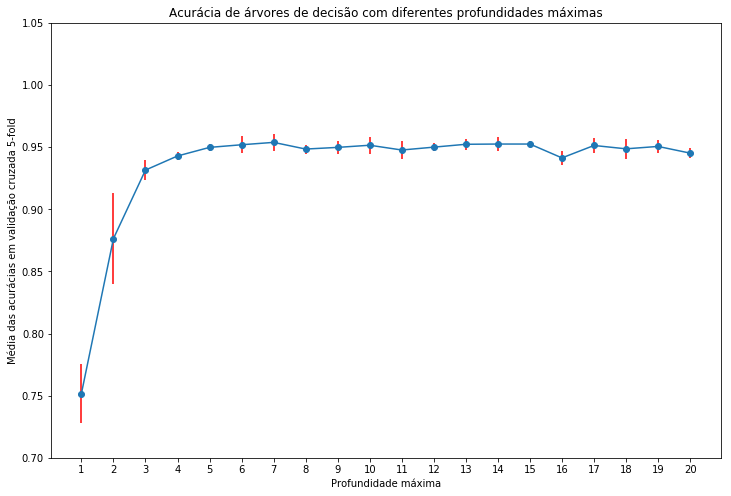

In [20]:
plt.figure(figsize=(12,8))
plt.errorbar(range(1, n_experiments+1), dt_accuracies.T[0], dt_accuracies.T[1], marker='o', ecolor='r')
plt.title("Acurácia de árvores de decisão com diferentes profundidades máximas")
plt.xlabel("Profundidade máxima")
plt.ylabel("Média das acurácias em validação cruzada 5-fold")
plt.xticks(range(1,n_experiments+1))
plt.yticks(np.arange(0.7,1.05,0.05));

A partir da altura 7, não enxergamos melhoria expressiva na acurácia, e a performance da árvore se "estabiliza". Conclui-se que uma árvore de profundidade máxima 7 já é razoável para classificação do problema utilizando esse método, por ter a vantagem de ser provavelmente mais generalizável que árvores de maior tamanho. Para futura comparação com outros classificadores, guardemos suas métricas de avaliação.

In [21]:
dt_results = np.array(dt_results[6])
results.loc["Decision Tree"] = [dt_results.mean(axis=0), dt_results.std(axis=0)]
results.loc["Decision Tree"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.953863,0.927401,0.961064,0.955088
Desvio Padrão,0.006856,0.014409,0.008077,0.006593


Uma propriedade interessante das árvores de decisão é que o processo de classificação é uma "caixa branca", que ao contrário da "caixa preta" de outros métodos, podemos visualizar e entender facilmente.

No módulo `sklearn.tree` podemos exportar as árvores como representação _dot_, e usar o módulo `pydot` para salvá-las como imagens:

In [22]:
import pydot

def image_from_tree(dt, filename):
    dot_data = tree.export_graphviz(dt, feature_names=koi.columns,  
                     class_names=["FALSE POSITIVE", "CONFIRMED"],  
                     filled=True, rounded=True,
                     special_characters=True) 
    (graph, ) = pydot.graph_from_dot_data(dot_data)
    graph.write_png(filename) 
image_from_tree(tree.DecisionTreeClassifier().fit(koi, target), "dt_maxdepth.png")
image_from_tree(tree.DecisionTreeClassifier(max_depth=3).fit(koi, target), "dt_depth3.png")
image_from_tree(tree.DecisionTreeClassifier(max_depth=7).fit(koi, target), "dt_depth7.png")

Na representação gráfica, temos as perguntas, a impureza de Gini de cada subconjunto, o número de amostras no subconjunto, a quantidade de elementos por classe, e a classe associada ao nó. Além disso, a cor dos nós representa a sua homogeneidade.

![Árvore de Profundidade Ilimitada](dt_maxdepth.png)
É possível ver que muitas das folhas da árvore de máxima profundidade possuem uma ou poucas observações, e é esse o _overfitting_ do modelo; condições demasiadamente complexas para **perfeitamente** classificar, **especificamente**, o conjunto de treinamento.

![Árvore de Profundidade Máxima 3](dt_depth3.png)

![Árvore de Profundidade Máxima 7](dt_depth7.png)
Com a representação das árvores de profundidade 3 e 7 lado a lado, fica evidente a necessidade de expansão da árvore para aumentar a acurácia do modelo; várias ramificações após as folhas da primeira árvore alteram a classificação da entrada.

---

# SVM

**Support-Vector Machines** (SVM) são modelos de aprendizado supervisionado, usados para classificação e análise de regressão. Diferentemente do Naive Bayes e das Árvores de Decisão, trata-se de um modelo não-probabilístico; isto é, um SVM apenas atribui uma entrada a uma categoria ou outra, sem obter distribuições de probabilidade (embora existam métodos para adapatar o SVM a esse contexto). Além disso, o SVM é um classificador binário (embora existam procedimentos que permitem estender o SVM para problemas multiclasse).

O funcionamento do SVM consiste em representar o conjunto de dados em um espaço geométrico em que cada atributo define uma dimensão, para, então, construir hiperplanos nesse espaço. Em um problema de classificação, estes hiperplanos servem como um separador entre os representantes de cada classe, mas podem ser usados também para regressão, entre outras tarefas. 

É comum que os conjuntos de interesse não sejam linearmente separáveis no espaço construído. Para contornar essa limitação do uso de hiperplanos, o espaço é mapeado para outro de muito mais dimensões, presumivelmente tornando as classes mais facilmente separáveis. Esse mapeamento é definido em termos de uma função **kernel**, escolhida de acordo com sua adequação ao problema. Em outras palavras, a _kernel_ define a curvatura, ou "desenho", do hiperplano.

Vamos realizar experimentos a fim de analisar a performance do SVM para o nosso problema de classificação de KOIs, avaliando a adequação das funções linear, sigmoide, polinomial e RBF como _kernel_. A classe `sklearn.SVM.SVC` implementa a classificação binária por SVM. Para melhorar a performance do SVM, utilizaremos dados **normalizados** _(a experimentação com valores absolutos levou tempo indeterminado, tornando-se inviável considerar a opção)_. Para o valor de **C**, hiperparâmetro que penaliza erros de classificação no treinamento do modelo, os melhores resultados encontrados foram com $C = 1000$, escolhendo hiperplanos com menor margem de distância dos pontos.

### SVM com kernel linear

In [23]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1000)
svm_linear_results = []
for train, test in kfold.split(koi_minmax, target):
    svm_linear = svm_linear.fit(koi_minmax.iloc[train], target.iloc[train])
    y_pred = svm_linear.predict(koi_minmax.iloc[test])
    svm_linear_results.append(evaluate_prediction(target.iloc[test], y_pred))
svm_linear_results = np.array(svm_linear_results)
results.loc["SVM"] = [svm_linear_results.mean(axis=0), svm_linear_results.std(axis=0)]
results.loc["SVM"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.951751,0.925920,0.957275,0.952682
Desvio Padrão,0.003549,0.008979,0.012332,0.004577


### SVM com kernel sigmoide

Para kernels não-lineares, o hiperparâmetro _gamma_ define o quanto o modelo tenta se adequar perfeitamente ao conjunto de treinamento. Valores altos de _gamma_ causam _overfitting_. Escolhemos `'scale'`, que na verdade é $1/n*\sigma^2$, sendo $n$ o número de _features_, e $\sigma^2$ a variância dos dados.

In [24]:
from sklearn.svm import SVC
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale')
svm_sigmoid_results = []
for train, test in kfold.split(koi_minmax, target):
    svm_sigmoid = svm_sigmoid.fit(koi_minmax.iloc[train], target.iloc[train])
    y_pred = svm_sigmoid.predict(koi_minmax.iloc[test])
    svm_sigmoid_results.append(evaluate_prediction(target.iloc[test], y_pred))
svm_sigmoid_results = np.array(svm_sigmoid_results)
results.loc["SVM"] = [svm_sigmoid_results.mean(axis=0), svm_sigmoid_results.std(axis=0)]
results.loc["SVM"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.812193,0.831268,0.674250,0.790608
Desvio Padrão,0.017078,0.029307,0.038888,0.018339


### SVM com kernel polinomial

In [25]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly', degree=3, gamma='scale', C=1000)
svm_poly_results = []
for train, test in kfold.split(koi_minmax, target):
    svm_poly = svm_poly.fit(koi_minmax.iloc[train], target.iloc[train])
    y_pred = svm_poly.predict(koi_minmax.iloc[test])
    svm_poly_results.append(evaluate_prediction(target.iloc[test], y_pred))
svm_poly_results = np.array(svm_poly_results)
results.loc["SVM"] = [svm_poly_results.mean(axis=0), svm_poly_results.std(axis=0)]
results.loc["SVM"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.946558,0.910480,0.961917,0.949033
Desvio Padrão,0.003085,0.009756,0.004065,0.002904


### SVM com kernel RBF

In [26]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1000)
svm_rbf_results = []
for train, test in kfold.split(koi_minmax, target):
    svm_rbf = svm_rbf.fit(koi_minmax.iloc[train], target.iloc[train])
    y_pred = svm_rbf.predict(koi_minmax.iloc[test])
    svm_rbf_results.append(evaluate_prediction(target.iloc[test], y_pred))
svm_rbf_results = np.array(svm_rbf_results)
results.loc["SVM"] = [svm_rbf_results.mean(axis=0), svm_rbf_results.std(axis=0)]
results.loc["SVM"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.945599,0.911053,0.959462,0.947658
Desvio Padrão,0.005307,0.009186,0.005572,0.004693


Embora melhor que o Naive Bayes, o SVM não se saiu melhor do que as árvores de decisão. Como a acurácia resultante do experimento com _kernel_ linear foi, em média, maior do que as outras opções de _kernel_, o problema é, aparentemente, de natureza linear.

In [27]:
results.loc["SVM"] = [svm_linear_results.mean(axis=0), svm_linear_results.std(axis=0)]

---

# k-NN

**k-NN**, ou **k-Nearest Neighbors**, diferentemente dos outros métodos apresentados, é um algoritmo de aprendizagem preguiçosa (_lazy learning_). Isto é, a generalização do modelo é feita à medida em que novas entradas são introduzidas, não durante o seu treinamento. Seu uso é mais recomendado para problemas de baixa dimensionalidade, e se mostra eficiente em conjuntos de dados grandes e que se atualizam frequentemente.

Dada uma nova observação não-classificada, o algoritmo consiste em classificá-la a partir da classe mais frequente entre os seus $k$ elementos mais próximos. Por isso, o método geralmente não se sai bem para problemas com alta dimensionalidade; o conceito de distância euclidiana que temos na geometria perde a sua conotação nesses casos. Um grande número de dimensões, além de requerer quantidades exponencialmente maiores de dados, também torna o método mais propenso a _overfitting_.

Como todo hiperparâmetro, não existe um valor ótimo para $k$, e este deve ser escolhido de acordo com o conjunto de dados. Um valor pequeno torna a classificação mais suscetível a ruídos, apresentando maior variação, e, embora valores grandes contornem esse problema, são computacionalmente mais caros e causam _overfitting_.

Vamos realizar experimentos variando o hiperparâmetro $k$, a fim de analisar seu impacto na qualidade do método para o problema em questão. O k-NN é implementado pela classe `sklearn.neighbors.KNeighborsClassifier`. É importante que o método seja utilizado com dados normalizados, para que _features_ em intervalos maiores não possuam mais peso na classificação por isso (i.e., atributos de grandezas menores terão menor influência no cálculo da distância euclidiana).

### Variação da média da acurácia na validação cruzada 5-fold para diferentes valores de k

In [28]:
from sklearn.neighbors import KNeighborsClassifier
n_experiments = 20
knn_accuracies = np.zeros((n_experiments, 2))
knn_results = []
for i in range(1, n_experiments+1):
    performance = []
    for train, test in kfold.split(koi_minmax, target):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = knn.fit(koi_minmax.iloc[train], target.iloc[train]) 
        y_pred = knn.predict(koi_minmax.iloc[test])
        performance.append(evaluate_prediction(target.iloc[test], y_pred))
    knn_results.append(performance)
    knn_accuracies[i-1] = [np.array(performance).mean(axis=0)[0], np.array(performance).std(axis=0)[0]]
knn_accuracies

array([[0.82352656, 0.0098843 ],
       [0.83217986, 0.01189465],
       [0.84082871, 0.01248289],
       [0.84640712, 0.01336884],
       [0.84160183, 0.0073506 ],
       [0.85006096, 0.0096933 ],
       [0.83564454, 0.01245996],
       [0.84544428, 0.00864506],
       [0.83275752, 0.00580584],
       [0.8458289 , 0.00571099],
       [0.83679543, 0.00721143],
       [0.84525031, 0.00997214],
       [0.83486921, 0.00682819],
       [0.84467727, 0.01291033],
       [0.83025974, 0.00812414],
       [0.84313825, 0.01183109],
       [0.83544742, 0.00270642],
       [0.84044428, 0.00638934],
       [0.83045186, 0.00665208],
       [0.84082908, 0.00782823]])

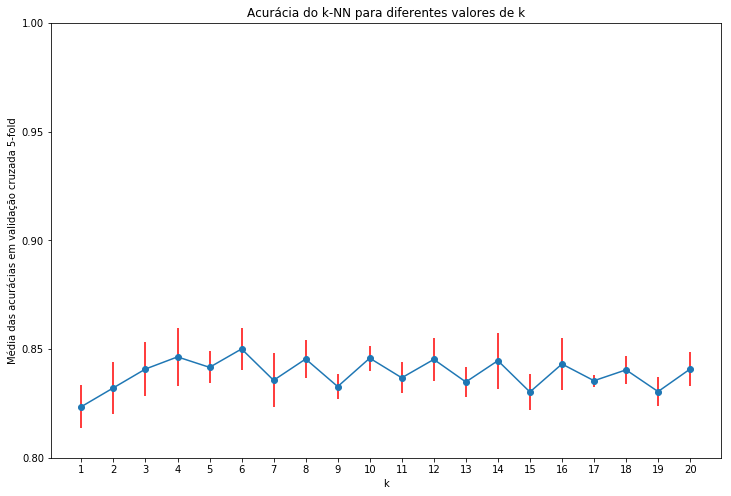

In [29]:
plt.figure(figsize=(12,8))
plt.errorbar(range(1, n_experiments+1), knn_accuracies.T[0], knn_accuracies.T[1], marker='o', ecolor='r')
plt.title("Acurácia do k-NN para diferentes valores de k")
plt.xlabel("k")
plt.ylabel("Média das acurácias em validação cruzada 5-fold")
plt.xticks(range(1,n_experiments+1))
plt.yticks(np.arange(0.8,1.05,0.05));

Podemos ver que a a maior acurácia foi atingida com $k = 4$. Valores menores são muito afetados por ruído, e valores maiores não apresentam melhoria, possivelmente por _overfitting_.

Em comparação com os outros métodos, o k-NN deixou a desejar; como mencionado anteriormente, o algoritmo não é muito eficaz com dados de alta dimensionalidade, e, no nosso problema, temos observações com **41** _features_.

In [30]:
knn_results = np.array(knn_results[3])
results.loc["k-NN"] = [knn_results.mean(axis=0), knn_results.std(axis=0)]
results.loc["k-NN"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.846407,0.782918,0.858422,0.848389
Desvio Padrão,0.013369,0.018345,0.027867,0.014826


---


# Random Forest

Random Forest (_floresta aleatória_) é um método de aprendizado _ensemble_ (conjunto) usado para classificação, regressão e outras tarefas. Como o nome sugere, consiste na construção de múltiplas árvores de decisão. As árvores são treinadas com os mesmos dados, e, fornecida uma entrada, a floresta retorna, em tarefas de classificação, a classe de maior frequência no conjunto de suas saídas (essa estratégia é conhecida como _bootstrap aggregating_, ou _bagging_).

A motivação por trás do Random Forest é contornar o hábito de _overfitting_ inerente às árvores de decisão. As árvores da floresta são construídas utilizando uma combinação aleatória de um número de features das observações (geralmente $\sqrt n$).

Realizaremos um experimento a fim de avaliar a adequação do uso de Random Forest para o nosso problema. Vamos analisar a variação da acurácia para diferentes quantidades de árvores na floresta, e selecionar a de melhor resultado. A dimensionalidade das árvores será mantida como $\sqrt n$, e o critério de ramificação será, assim como no experimento com árvores de decisão, a impureza de Gini. O método é implementado pela classe `sklearn.ensemble.RandomForestClassifier`.

In [31]:
from sklearn.ensemble import RandomForestClassifier

n_experiments = 20
rf_accuracies = np.zeros((n_experiments, 2))
rf_results = []
for i in range(2, n_experiments+2):
    performance = []
    for train, test in kfold.split(koi, target):
        rf = RandomForestClassifier(n_estimators=i, bootstrap=False)
        rf = rf.fit(koi.iloc[train], target.iloc[train]) 
        y_pred = rf.predict(koi.iloc[test])
        performance.append(evaluate_prediction(target.iloc[test], y_pred))
    rf_results.append(performance)
    rf_accuracies[i-2] = [np.array(performance).mean(axis=0)[0], np.array(performance).std(axis=0)[0]]
rf_accuracies

array([[0.93656118, 0.00918905],
       [0.95674721, 0.00649363],
       [0.95444118, 0.00691904],
       [0.96309152, 0.00261659],
       [0.96193859, 0.00629975],
       [0.96482266, 0.00386022],
       [0.96174333, 0.00622288],
       [0.96693675, 0.00366893],
       [0.96347484, 0.00853786],
       [0.96731933, 0.00339293],
       [0.9657829 , 0.00223388],
       [0.96674536, 0.00655621],
       [0.96866511, 0.00433111],
       [0.97154955, 0.0016738 ],
       [0.96693878, 0.00820146],
       [0.96866696, 0.00627183],
       [0.96732099, 0.00315007],
       [0.96885465, 0.00815858],
       [0.96866585, 0.00612995],
       [0.97020542, 0.00500302]])

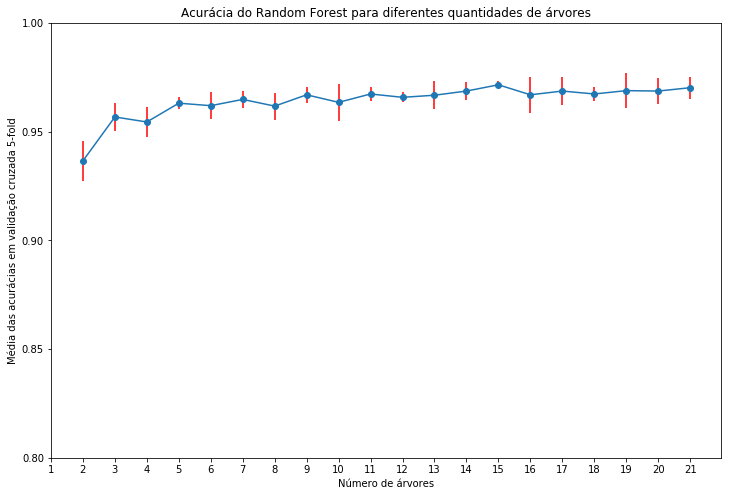

In [32]:
plt.figure(figsize=(12,8))
plt.errorbar(range(2, n_experiments+2), rf_accuracies.T[0], rf_accuracies.T[1], marker='o', ecolor='r')
plt.title("Acurácia do Random Forest para diferentes quantidades de árvores")
plt.xlabel("Número de árvores")
plt.ylabel("Média das acurácias em validação cruzada 5-fold")
plt.xticks(range(1,n_experiments+2))
plt.yticks(np.arange(0.8,1.05,0.05));

Vamos selecionar a Random Forest de maior acurácia média para comparação com os outros modelos.

In [33]:
rf_results = np.array(rf_results[rf_accuracies.argmax(axis=0)[0]])
results.loc["Random Forest"] = [rf_results.mean(axis=0), rf_results.std(axis=0)]
results.loc["Random Forest"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.971550,0.966291,0.963475,0.970297
Desvio Padrão,0.001674,0.011269,0.012234,0.002826


Podemos ver que a estratégia de Random Forest cumpriu sua finalidade de contornar o overfitting das árvores de decisão, uma vez que apresentou métricas melhores que as obtidas com o uso de apenas uma árvore. Ademais, o crescimento no número de árvores geralmente não causa _overfitting_ [(fonte)](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks).

---

# Gradient Tree Boosting

Boosting é uma técnica de aprendizado supervisionado conjunto, usado em tarefas de regressão e classificação. Em cada iteração $1 \leq m \leq M$ do método, existe um modelo imperfeito $F_m$. O algoritmo melhora o modelo adicionando outro estimador $h$:  $F_{m+1} = F_m(x) + h(x)$. $h$ é construído com o objetivo de "cobrir" os erros de $F_m$.

A técnica de Gradient Boosting segue a mesma ideia geral de Boosting, usando a estratégia de descida de gradiente (Gradient Descent) para minimizar uma função de erro $L(F(x), y)$.

O Gradient Tree Boosting é um modelo que utiliza a técnica de Gradient Boosting com Árvores de Decisão como estimadores construtores do modelo. Vamos realizar um experimento a fim de analisar o impacto das iterações no método, usando a classe `sklearn.ensemble.GradientBoostingClassifier` e executando 500 iterações do algoritmo.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb_results = []
train_accuracies = []
test_accuracies = []
n_iters=500
for train, test in kfold.split(koi, target):
    gb = GradientBoostingClassifier(n_estimators=n_iters, learning_rate=0.1, max_depth=2)
    gb = gb.fit(koi.iloc[train], target.iloc[train]) 
    y_pred = gb.predict(koi.iloc[test])
    gb_results.append(evaluate_prediction(target.iloc[test], y_pred))
    train_accuracies.append([])
    test_accuracies.append([])
    for i, y_pred in enumerate(gb.staged_predict(koi.iloc[train])):
        train_accuracies[-1].append(metrics.accuracy_score(target.iloc[train], y_pred))
    for i, y_pred in enumerate(gb.staged_predict(koi.iloc[test])):
        test_accuracies[-1].append(metrics.accuracy_score(target.iloc[test], y_pred))    
mean_train_accuracies = np.array(train_accuracies).mean(axis=0)
std_train_accuracies = np.array(train_accuracies).std(axis=0)
mean_test_accuracies = np.array(test_accuracies).mean(axis=0)
std_test_accuracies = np.array(test_accuracies).std(axis=0);

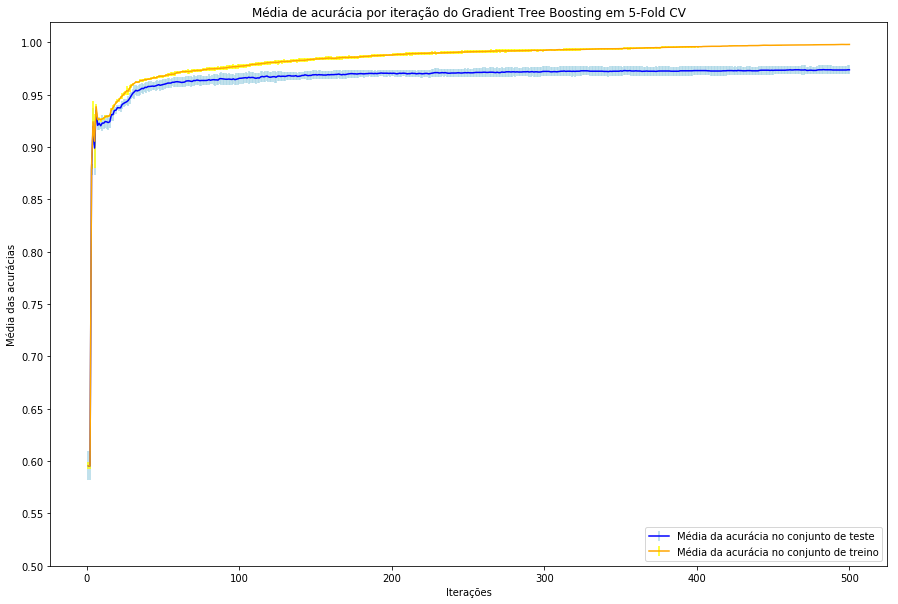

In [68]:
plt.figure(figsize=(15,10))
plt.errorbar(range(1, n_iters+1), mean_test_accuracies, std_test_accuracies, color='blue', ecolor='lightblue', label='Média da acurácia no conjunto de teste')
plt.errorbar(range(1, n_iters+1), mean_train_accuracies, std_train_accuracies, color='orange', ecolor='yellow', label='Média da acurácia no conjunto de treino')
plt.title("Média de acurácia por iteração do Gradient Tree Boosting em 5-Fold CV")
plt.xlabel("Iterações")
plt.ylabel("Média das acurácias")
plt.yticks(np.arange(0.5,1.05,0.05))
plt.legend(loc='lower right');

In [69]:
gb_results = np.array(gb_results)
results.loc["Gradient Tree Boosting"] = [gb_results.mean(axis=0), gb_results.std(axis=0)]
results.loc["Gradient Tree Boosting"]

,Acurácia,Precisão,Revocação,ROC AUC
Medida,,,,
Média,0.973855,0.960374,0.975850,0.974169
Desvio Padrão,0.004410,0.006227,0.007835,0.004634


Podemos ver que, após ~200 iterações, apesar da acurácia no conjunto de treino continuar crescendo (esperado, uma vez que a adição de estimadores é feita a partir da minimização do erro no conjunto de treino), a acurácia no conjunto teste se estabiliza. Ou seja, a generalização do modelo não melhora junto com a quantidade de estimadores. Como esta também não diminuiu, podemos dizer que uma grande quantidade de iterações não deve causar _overfitting_.